In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv("df_arabica_clean (1).csv")
data = df.copy()
data.head(2)
# data.columns

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [52]:
data['Variety'].unique()

array(['Castillo', 'Gesha', 'Java', 'Red Bourbon', 'Sl34+Gesha', 'SL34',
       'Bourbon', 'Ethiopian Heirlooms', 'Caturra',
       'Wolishalo,Kurume,Dega', 'Typica', 'Catimor',
       'Castillo Paraguaycito', nan, 'SL28', 'SL14', 'Catuai',
       'Yellow Bourbon', 'Catrenic', 'unknown', 'Pacamara',
       'Castillo and Colombia blend', 'Jember,TIM-TIM,Ateng',
       'BOURBON, CATURRA Y CATIMOR', 'Bourbon Sidra', 'Sarchimor',
       'Catimor,Catuai,Caturra,Bourbon', 'Parainema', 'SHG',
       'Typica + SL34',
       'MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI',
       'Mundo Novo', 'Red Bourbon,Caturra', 'Lempira', 'Typica Gesha',
       'Gayo', 'Bourbon, Catimor, Caturra, Typica', 'unknow',
       'Maragogype', 'Caturra-Catuai', 'SL28,SL34,Ruiru11',
       'Yellow Catuai', 'Catucai', 'Santander',
       'Typica Bourbon Caturra Catimor', 'Caturra,Colombia,Castillo',
       'Castillo,Caturra,Bourbon', 'Pacas', 'Catuai and Mundo Novo'],
      dtype=object)

In [53]:
data = data[['Country of Origin', 'Altitude', 'Region',
       'Variety', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Overall',
       'Moisture Percentage', 'Category Two Defects',
       'Quakers', 'Color']]
# print(data.shape)
# data.nunique()
data.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Moisture Percentage,Category Two Defects,Quakers
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,7.676812,10.735266,2.251208,0.690821
std,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.306359,1.247468,2.950183,1.686918
min,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,6.670000,0.000000,0.000000,0.000000
25%,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,7.500000,10.100000,0.000000,0.000000
50%,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,7.670000,10.800000,1.000000,0.000000
75%,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,7.920000,11.500000,3.000000,1.000000
max,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,8.580000,13.500000,16.000000,12.000000


In [54]:
data['Country of Origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand', 'Brazil',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Indonesia', 'Peru',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

In [55]:
Country_of_Origin_Dict = dict(zip(pd.Series(data['Country of Origin'].unique()),pd.Series([i for i in range(data['Country of Origin'].nunique())]) ))
Altitude_Dict = dict(zip(pd.Series(data['Altitude'].unique()),pd.Series([i for i in range(data['Altitude'].nunique())]) ))
Region_Dict = dict(zip(pd.Series(data['Region'].unique()),pd.Series([i for i in range(data['Region'].nunique())]) ))
Variety_Dict = dict(zip(pd.Series(data['Variety'].unique()),pd.Series([i for i in range(data['Variety'].nunique())]) ))
Processing_Method_Dict = dict(zip(pd.Series(data['Processing Method'].unique()),pd.Series([i for i in range(data['Processing Method'].nunique())]) ))
Color_Dict = dict(zip(pd.Series(data['Color'].unique()),pd.Series([i for i in range(data['Color'].nunique())]) ))


data['Country of Origin Label'] = data['Country of Origin'].map(Country_of_Origin_Dict)
data['Altitude Label']=data['Altitude'].map(Altitude_Dict)
data['Region Label'] =data['Region'].map(Region_Dict)
data['Variety Label']=data['Variety'].map(Variety_Dict)
data['Processing Method Label']=data['Processing Method'].map(Processing_Method_Dict)
data['Color Label']= data['Color'].map(Color_Dict)


data.drop(['Country of Origin','Altitude','Region','Variety','Processing Method','Color'], axis =1 ,inplace = True)

In [56]:
data.isna().sum()

Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Overall                    0
Moisture Percentage        0
Category Two Defects       0
Quakers                    0
Country of Origin Label    0
Altitude Label             1
Region Label               1
Variety Label              1
Processing Method Label    1
Color Label                0
dtype: int64

In [57]:
data.dropna(inplace = True)

In [58]:
data.isna().sum()

Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Overall                    0
Moisture Percentage        0
Category Two Defects       0
Quakers                    0
Country of Origin Label    0
Altitude Label             0
Region Label               0
Variety Label              0
Processing Method Label    0
Color Label                0
dtype: int64

In [59]:
X = df.drop(['Category Two Defects'], axis =1)
y = df['Category Two Defects']

In [60]:
y.value_counts()

Category Two Defects
0     74
2     37
1     34
3     16
5     13
4     13
7      5
8      4
12     3
11     3
9      2
16     1
10     1
13     1
Name: count, dtype: int64

In [61]:
data_new =data[(data['Category Two Defects']!=16)&(data['Category Two Defects']!=10)&(data['Category Two Defects']!=13)]

X = data_new.drop(['Category Two Defects'], axis =1)
y = data_new['Category Two Defects']

y.value_counts()

Category Two Defects
0     74
2     36
1     33
3     16
5     13
4     13
7      5
8      4
12     3
11     3
9      2
Name: count, dtype: int64

In [62]:
smote = SMOTE(sampling_strategy= 'minority',k_neighbors=1)
X_sm , y_sm = smote.fit_resample(X,y)
y_sm.value_counts() 
for i in range(9):
    smote = SMOTE(sampling_strategy= 'minority',k_neighbors=1)
    X_sm , y_sm = smote.fit_resample(X_sm,y_sm)
y_sm.value_counts()

Category Two Defects
3     74
0     74
2     74
1     74
5     74
4     74
9     74
7     74
12    74
11    74
8     74
Name: count, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train ,y_test = train_test_split(X_sm, y_sm , test_size=0.2, random_state=23)

In [64]:
model = RandomForestClassifier(n_estimators=150, random_state=23)

model.fit(X_train , y_train)

model.score(X_test , y_test)

0.8711656441717791

In [65]:
# Code snippet to reorder columns if necessary
input_df = X_test[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
                   'Uniformity', 'Overall', 'Moisture Percentage', 'Quakers',
                   'Country of Origin Label', 'Altitude Label', 'Region Label',
                   'Variety Label', 'Processing Method Label', 'Color Label']]

# Now you can make predictions using the model
predictions = model.predict(input_df)

# Rest of your code for evaluation and visualization


In [66]:
predictions = model.predict(X_test)

In [67]:
predictions

array([ 3,  1,  7,  3,  5, 11,  7,  2,  8,  0,  2, 11,  2,  5,  0,  3,  9,
        2,  4,  1,  5,  9,  7,  9,  8,  7,  2,  2,  5, 11,  1, 11, 12,  3,
       12,  3,  5,  3, 12,  4,  8,  5,  3,  4,  2,  2,  8,  1, 11,  2,  4,
        2, 11,  9,  3,  0,  4,  5,  0, 12, 12,  8,  4, 11,  8,  1,  4,  8,
        2,  2,  5,  0,  1,  1,  9,  2,  8,  0,  7,  4,  9,  1, 11,  3,  5,
        9,  5, 12,  2, 11, 11,  7,  3,  9,  4, 11,  7,  8,  7,  9,  9,  7,
        9,  0, 12,  0,  4,  9,  7,  8,  1, 12,  3,  0,  2, 12,  7,  3,  9,
        3,  5,  7,  2,  0,  8,  1,  9,  5,  3, 12,  9,  5,  7,  5,  2,  0,
        0,  8,  1,  1,  5,  5,  1,  3,  2,  1,  5, 12,  8,  8,  7,  0,  0,
        5,  3,  8,  1,  4,  7, 11,  4,  7,  8], dtype=int64)

In [68]:
print("\n\n Classification Report    : \n\n", classification_report(y_test,predictions))



 Classification Report    : 

               precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.80      0.63      0.71        19
           2       0.67      0.75      0.71        16
           3       0.88      0.88      0.88        16
           4       1.00      0.86      0.92        14
           5       0.94      0.89      0.92        19
           7       0.88      1.00      0.93        14
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        11

    accuracy                           0.87       163
   macro avg       0.88      0.88      0.88       163
weighted avg       0.88      0.87      0.87       163



In [69]:
print("Accuracy of Model::", model.score(X_test, y_test))

Accuracy of Model:: 0.8711656441717791


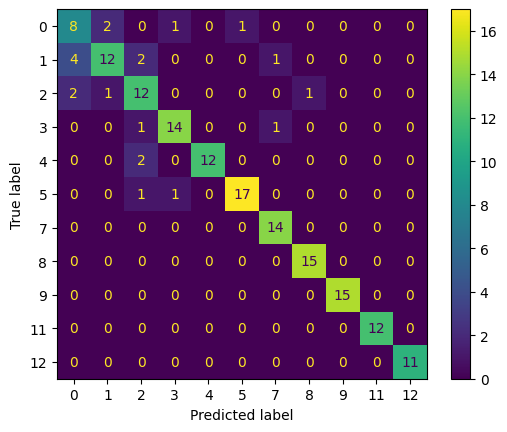

In [70]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predictions)

cm_obj = ConfusionMatrixDisplay(cm, display_labels=['0','1','2','3','4','5','7','8','9','11','12'])

cm_obj.plot()

In [71]:
import pickle
pickle.dump(model, open('Coffee_Quality_Model.pkl', 'wb'))

In [72]:
X_train.columns

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Overall', 'Moisture Percentage', 'Quakers',
       'Country of Origin Label', 'Altitude Label', 'Region Label',
       'Variety Label', 'Processing Method Label', 'Color Label'],
      dtype='object')

In [73]:
# Reversing the Region_Dict dictionary to map encoded region values to countries
encoded_region_to_country = {v: k for k, v in Color_Dict.items()}

# Print the mapping from encoded region values to countries
print(encoded_region_to_country)

{0: 'green', 1: 'blue-green', 2: 'yellowish', 3: 'yellow-green', 4: 'yellow green', 5: 'greenish', 6: 'brownish', 7: 'yellow- green', 8: 'browish-green', 9: 'bluish-green', 10: 'pale yellow', 11: 'yello-green'}


In [74]:
prediction = model.predict([[0, 100, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 0]])
value = prediction[0]
print(value)

7
